<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-02-18 05:14:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  50.7MB/s    in 4.1s    

2025-02-18 05:14:24 (49.5 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [22]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


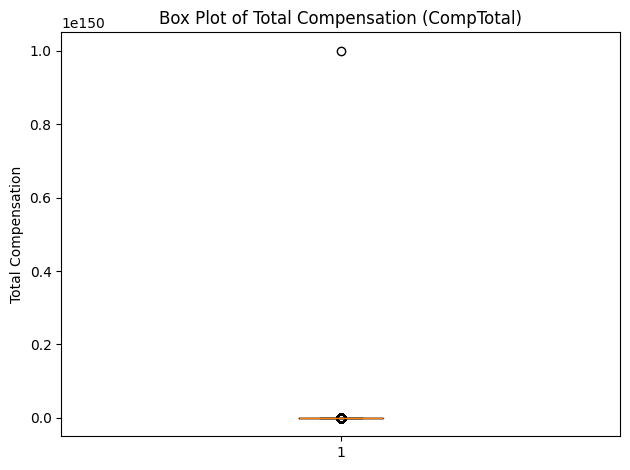

In [8]:
# your code goes here

QUERY = """
SELECT CompTotal
FROM main 
"""
df_CompTotal = pd.read_sql_query(QUERY, conn)
df_CompTotal = df_CompTotal.dropna()

plt.boxplot(df_CompTotal)
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('Total Compensation')

# Show the plot
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


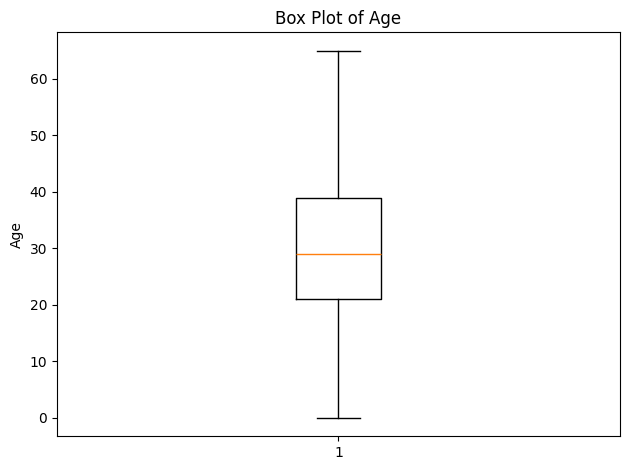

In [9]:
# your code goes here
QUERY = """SELECT 
    CASE
        WHEN Age LIKE '%under%' THEN 18
        WHEN Age LIKE '%older%' THEN 65
        WHEN Age LIKE '%-%' THEN 
            (CAST(SUBSTR(Age, 1, INSTR(Age, '-') - 1) AS INTEGER) + 
             CAST(SUBSTR(Age, INSTR(Age, '-') + 1) AS INTEGER)) / 2
        ELSE 0        
    END AS Age_int
FROM main"""
df_intAge = pd.read_sql_query(QUERY, conn).dropna()

plt.boxplot(df_intAge)
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Show the plot
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


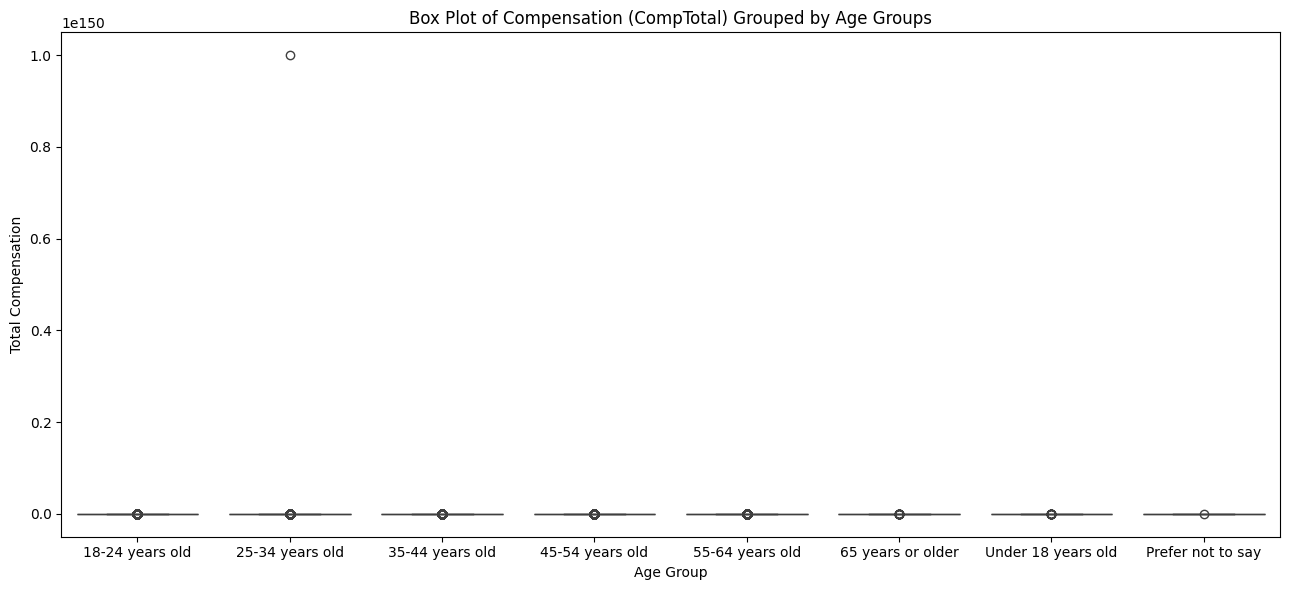

In [23]:
# your code goes here
QUERY = """
SELECT Age, CompTotal 
FROM main 
"""
df_CompTotalByAge = pd.read_sql_query(QUERY, conn).dropna()

plt.figure(figsize=(13, 6))
sns.boxplot(x=df_CompTotalByAge['Age'], y=df_CompTotalByAge['CompTotal'], data=df_CompTotalByAge)

plt.title('Box Plot of Compensation (CompTotal) Grouped by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')

# Show the plot
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


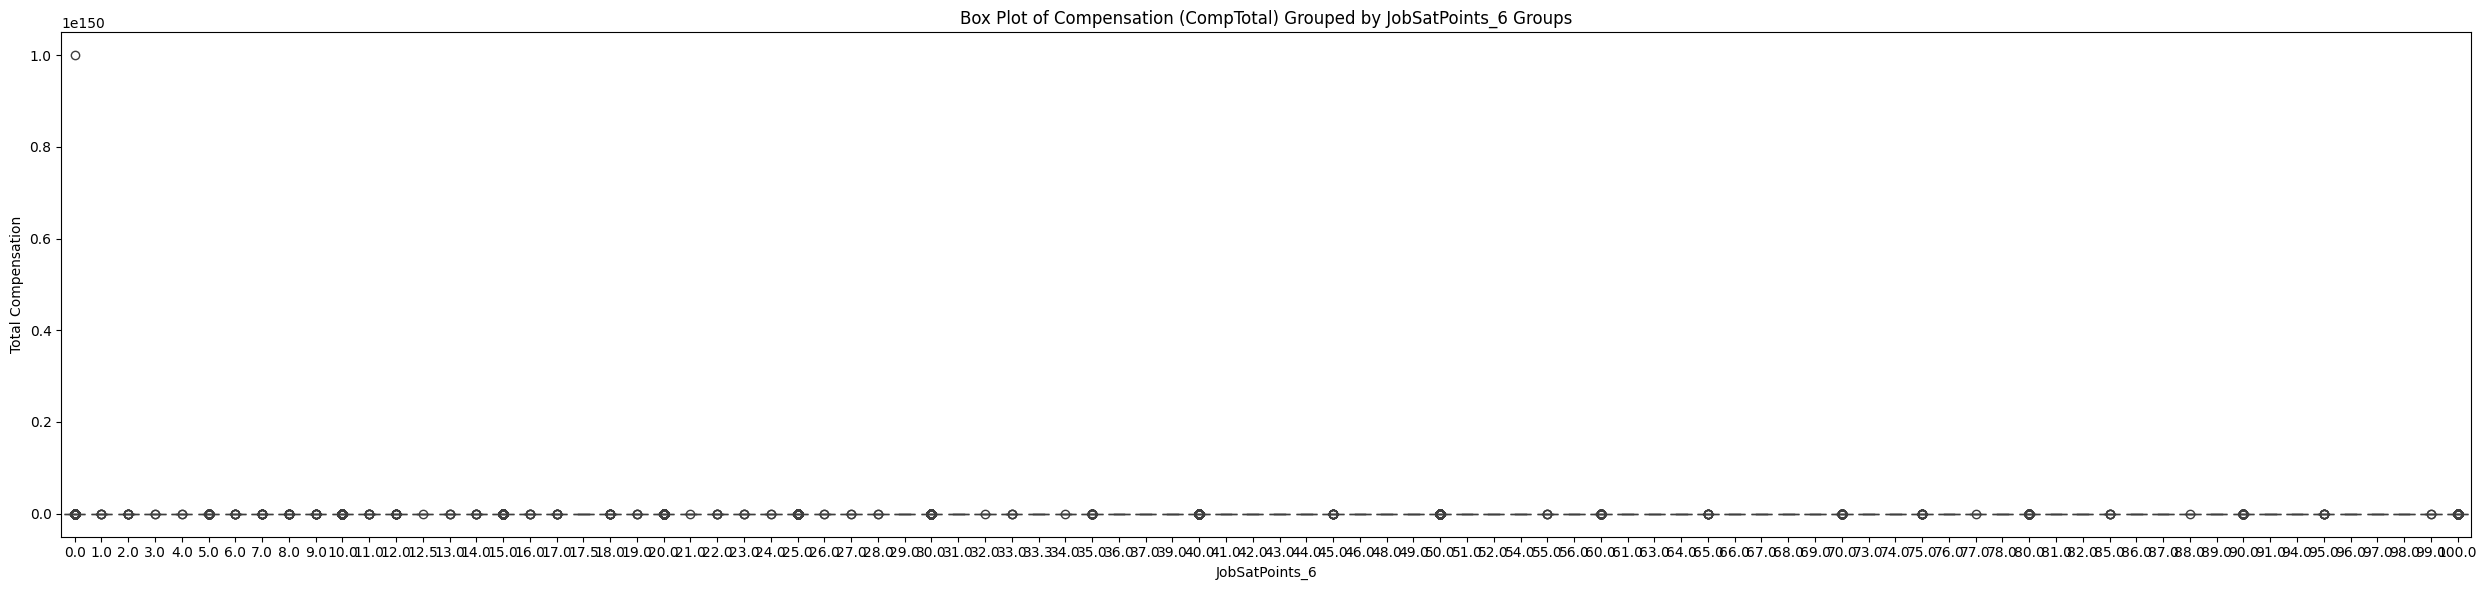

In [34]:
# your code goes here
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main 
"""
df_CompTotalByJobSatPoints_6 = pd.read_sql_query(QUERY, conn).dropna()

plt.figure(figsize=(25, 6))
sns.boxplot(x=df_CompTotalByJobSatPoints_6['JobSatPoints_6'], y=df_CompTotalByJobSatPoints_6['CompTotal'], data=df_CompTotalByJobSatPoints_6)

plt.title('Box Plot of Compensation (CompTotal) Grouped by JobSatPoints_6 Groups')
plt.xlabel('JobSatPoints_6')
plt.ylabel('Total Compensation')

# Show the plot
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


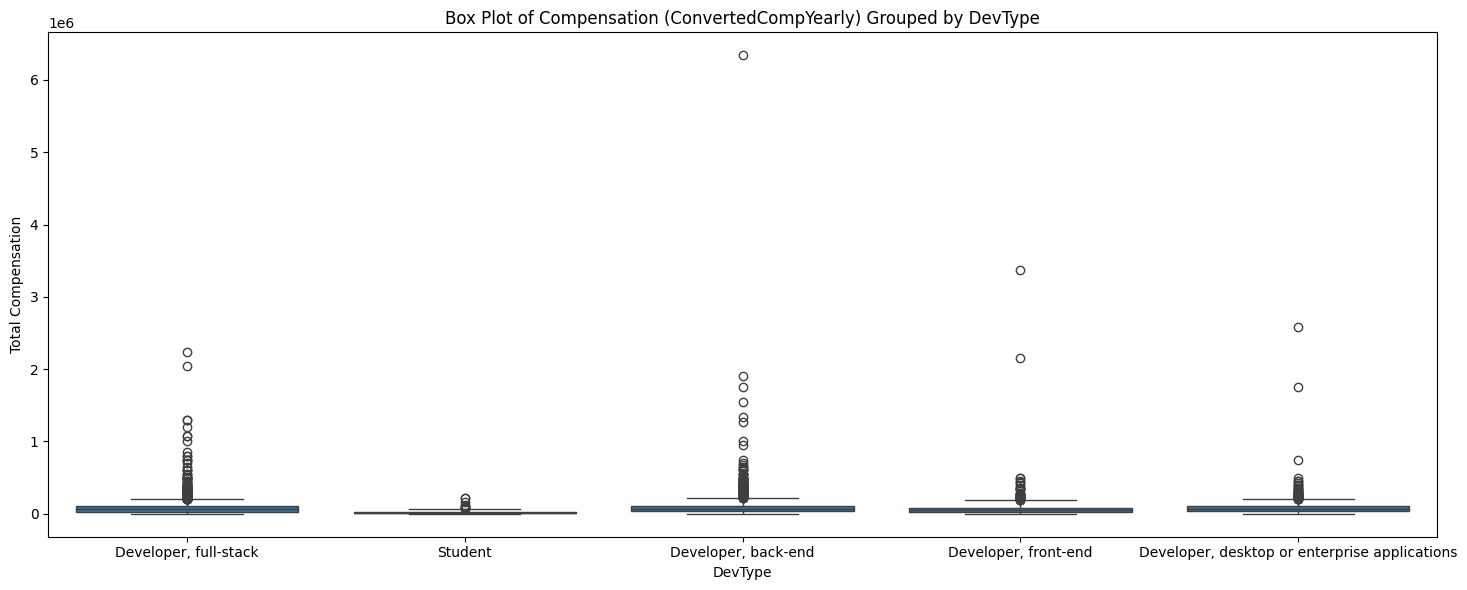

In [48]:
# your code goes here
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
top5DevType = df['DevType'].value_counts().nlargest(5).index
df_top5 = df[df['DevType'].isin(top5DevType)]

plt.figure(figsize=(15, 6))
sns.boxplot(x=df_top5['DevType'], y=df_top5['ConvertedCompYearly'], data=df_top5)

plt.title('Box Plot of Compensation (ConvertedCompYearly) Grouped by DevType')
plt.xlabel('DevType')
plt.ylabel('Total Compensation')

# Show the plot
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


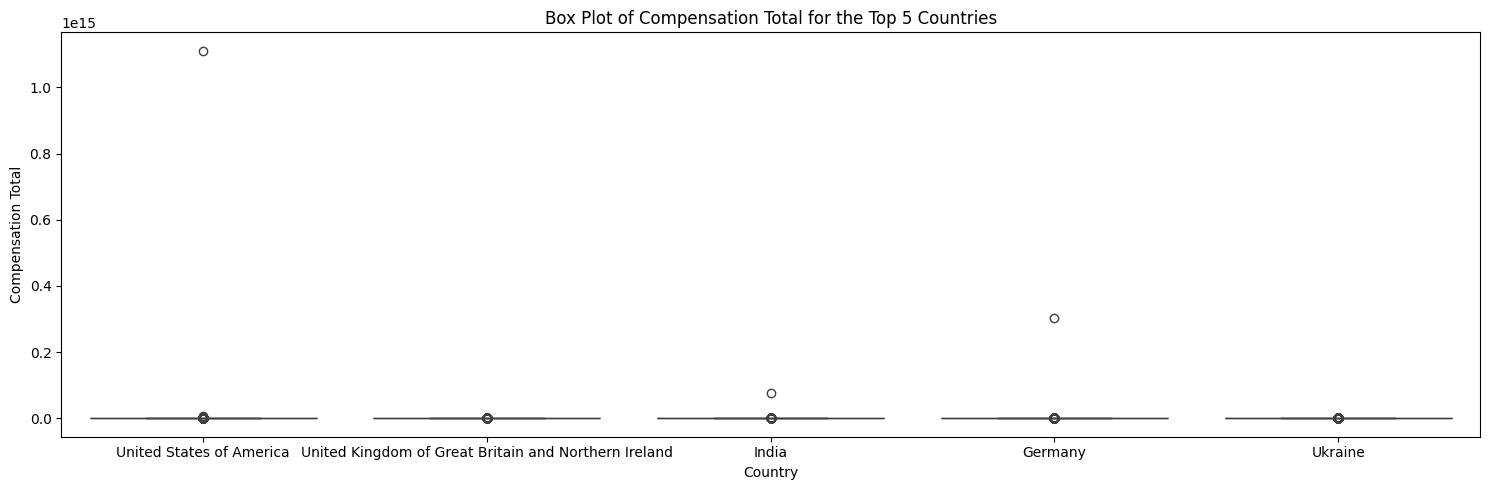

In [63]:
# your code goes here
QUERY = """ SELECT Country, COUNT(*) AS Count 
            FROM main 
            WHERE Country IS NOT NULL 
            GROUP BY Country 
            ORDER BY Count DESC 
            LIMIT 5"""
df_top5Countries = pd.read_sql_query(QUERY, conn)

top5Countries = df_top5Countries['Country'].tolist()
QUERY = """ SELECT Country, CompTotal FROM main WHERE Country IN ({})""".format(','.join(['?']*len(top5Countries)))
df = pd.read_sql_query(QUERY, conn, params=top5Countries)

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['Country'], y=df['CompTotal'], data=df)

# Add labels and title
plt.title('Box Plot of Compensation Total for the Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Compensation Total')

# Show the plot
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [68]:
# your code goes here
QUERY = """ SELECT Employment, CompTotal
            FROM main 
            """
df_Employment  = pd.read_sql_query(QUERY, conn)
df_Employment['Employment'].unique()

array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


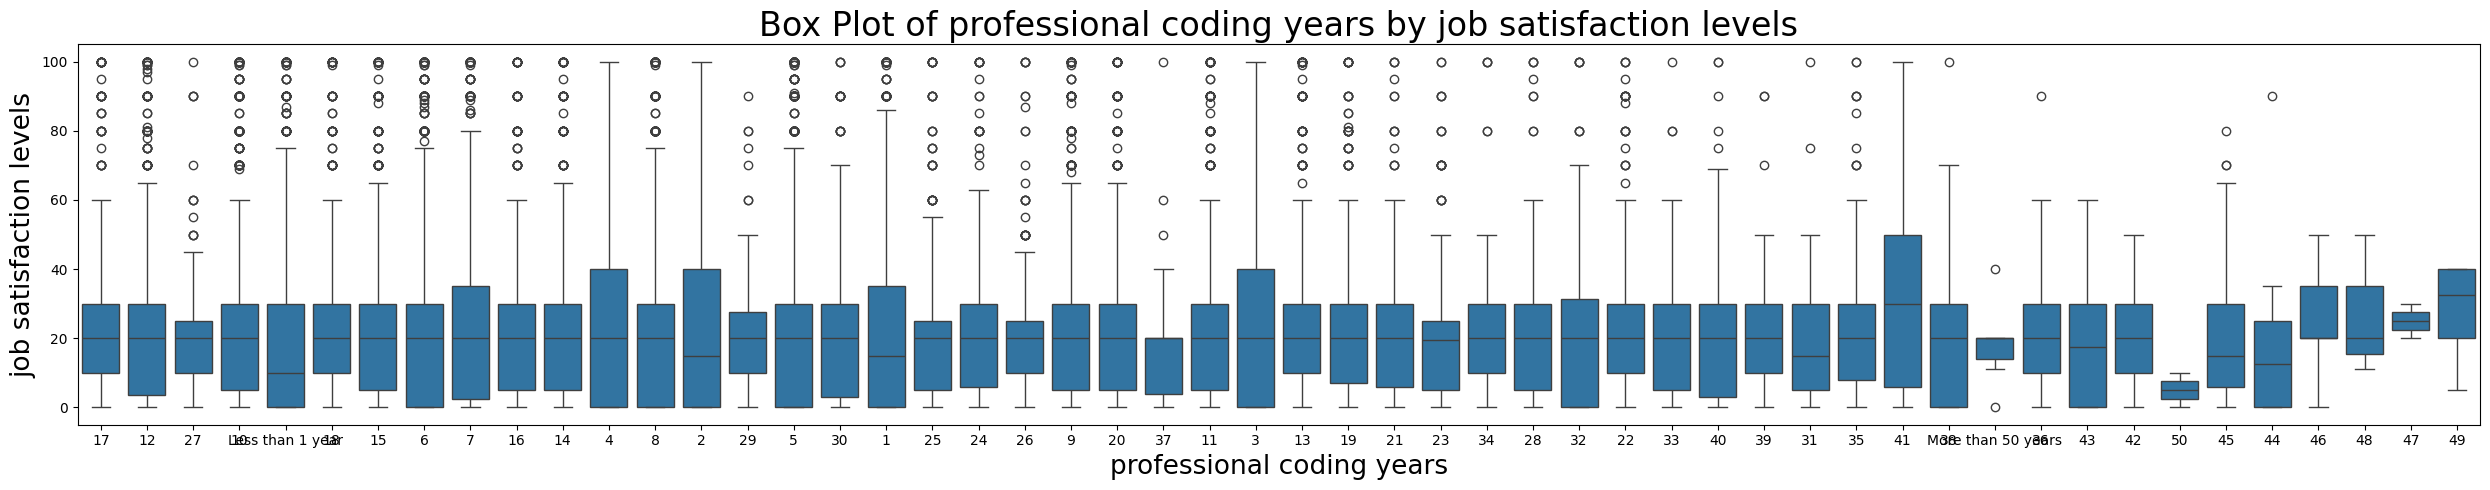

In [22]:
# your code goes here
QUERY = """ SELECT JobSatPoints_6, COUNT(*) AS Count 
            FROM main 
            WHERE JobSatPoints_6 IS NOT NULL 
            GROUP BY JobSatPoints_6 
            ORDER BY Count DESC 
        """
df_JobSat = pd.read_sql_query(QUERY, conn)

YearsCodePro_list = df_JobSat['JobSatPoints_6'].tolist()
QUERY = """ SELECT JobSatPoints_6, YearsCodePro FROM main WHERE JobSatPoints_6 IN ({})""".format(','.join(['?']*len(YearsCodePro_list)))
df = pd.read_sql_query(QUERY, conn, params=YearsCodePro_list)

plt.figure(figsize=(25, 5))
sns.boxplot( x=df['YearsCodePro'], y=df['JobSatPoints_6'], data=df)

# Add labels and title
plt.title('Box Plot of professional coding years by job satisfaction levels', fontsize=24)
plt.ylabel('job satisfaction levels', fontsize=19)
plt.xlabel('professional coding years', fontsize=19)

# Show the plot
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
